## Implementation of Gradient Descent

This notebook shows examples on how the gradient descent methods perform on
logistic regression

In [1]:
include("../src/classification.jl")
using Main.Classification
using Random
using PyCall
using Statistics
import PyPlot; const plt=PyPlot
sklearn = pyimport("sklearn")

PyPlot

In [55]:
metrics = pyimport("sklearn.metrics");
Random.seed!(5);
datasets = pyimport("sklearn.datasets")
cancer = datasets.load_breast_cancer()
set = cancer
(Xtrain, Ytrain), (Xtest, Ytest) = traintestsplit(set["data"], set["target"], 0.8, 1000)
#Ytrain = convert(Vector{Float64}, Ytrain)
#Ytest = convert(Vector{Float64}, Ytest);

┌ Warning: Data set too small; using all
└ @ Main.Classification.Classifiers /home/erdos/gits/FYSSTK4155/projects/project2/src/classifier.jl:90


In [67]:
sklsets = pyimport("sklearn.datasets")
observables, target = sklsets.make_classification(n_samples=5000, n_features=20, n_informative=15,
n_redundant=1, n_repeated=0, n_classes=2, random_state=1, flip_y=0.05, class_sep=1.0, shuffle=true)
(Xtrain, Ytrain), (Xtest, Ytest) = traintestsplit(observables, target, 0.8, 5000);
#Ytrain = convert(Vector{Float64}, Ytrain)
#Ytest = convert(Vector{Float64}, Ytest);

## Gradient Descent

mean(tY .== predict(clf_gd, tX)) = 0.805
mean(tY .== predict(clf_gd, tX)) = 0.799


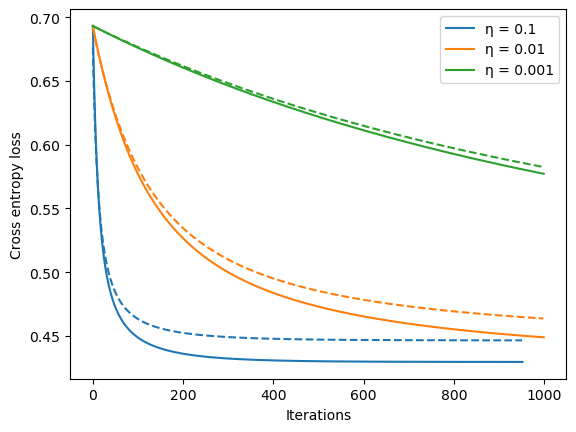

mean(tY .== predict(clf_gd, tX)) = 0.782


PyObject <matplotlib.legend.Legend object at 0x7f2633701b10>

In [68]:
fig, ax = plt.subplots()
for η in [0.1, 0.01, 0.001]
    X, Y = copy(Xtrain), copy(Ytrain)
    tX, tY = copy(Xtest), copy(Ytest)
    gd = GDContext(learningrate=η, tolerance=1e-7, maxiterations=1000)
    clf_gd = LogisticClassifier(GradientDescent(gd))
    add_designmatrix!(clf_gd, X)
    addvalidationset!(clf_gd, tX, tY, false)
    fit!(clf_gd, Y)
    line = ax.plot(clf_gd.optimizer.loss, label="η = $η")
    ax.plot(clf_gd.optimizer.validationloss, "--", c=line[1].get_color())
    @show mean(tY .== predict(clf_gd, tX))
end
ax.set_xlabel("Iterations")
ax.set_ylabel("Cross entropy loss")
ax.legend()

mean(tY .== predict(clf_gd, tX)) = 0.802
mean(tY .== predict(clf_gd, tX)) = 0.806
mean(tY .== predict(clf_gd, tX)) = 0.808
mean(tY .== predict(clf_gd, tX)) = 0.805
mean(tY .== predict(clf_gd, tX)) = 0.809
mean(tY .== predict(clf_gd, tX)) = 0.805
mean(tY .== predict(clf_gd, tX)) = 0.805
mean(tY .== predict(clf_gd, tX)) = 

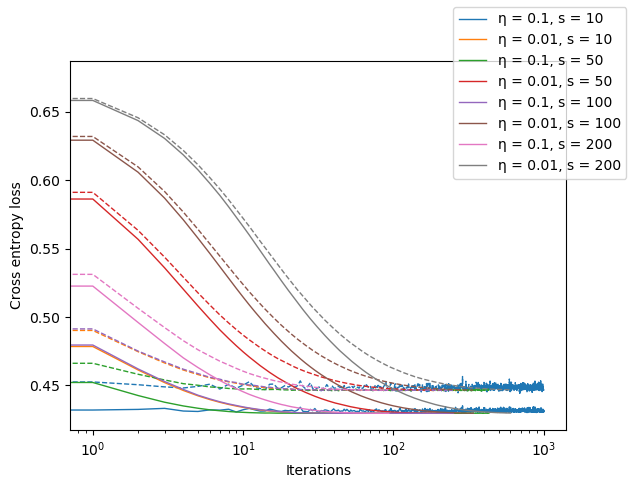

0.802


PyObject <matplotlib.legend.Legend object at 0x7f2632d0ff10>

In [69]:
fig, ax = plt.subplots()
#for η in [0.1, 0.01, 0.001]
for batchsize in [10, 50, 100, 200], η in [0.1, 0.01]
    gd = SGDContext(learningrate=η, tolerance=1e-7, maxiterations=1000,
        batchsize=batchsize)
    X, Y = copy(Xtrain), copy(Ytrain)
    tX, tY = copy(Xtest), copy(Ytest)
    clf_gd = LogisticClassifier(StochasticGradientDescent(gd))
    add_designmatrix!(clf_gd, X)
    addvalidationset!(clf_gd, tX, tY, false)
    fit!(clf_gd, Y)
    line = ax.plot(clf_gd.optimizer.loss, label="η = $η, s = $batchsize",
                   lw=1)
    ax.plot(clf_gd.optimizer.validationloss, "--", c=line[1].get_color(),
            lw=1)
    @show mean(tY .== predict(clf_gd, tX))
end
ax.set_xlabel("Iterations")
ax.set_ylabel("Cross entropy loss")
#ax.set_yscale("log")
ax.set_xscale("log")
fig.legend()

In [70]:
linear_model = pyimport("sklearn.linear_model")
clf = linear_model.SGDClassifier(max_iter=10000, learning_rate="optimal")
clf.fit(Xtrain, Ytrain)
@show clf.score(Xtrain, Ytrain)
@show clf.score(Xtest, Ytest)

clf.score(Xtrain, Ytrain) = 0.7515
clf.score(Xtest, Ytest) = 0.753


0.753

mean(tY .== predict(clf_gd, tX)) = 0.793
mean(tY .== predict(clf_gd, tX)) = 0.803
mean(tY .== predict(clf_gd, tX)) = 0.791
mean(tY .== predict(clf_gd, tX)) = 0.806
mean(tY .== predict(clf_gd, tX)) = 0.803
mean(tY .== predict(clf_gd, tX)) = 0.806
mean(tY .== predict(clf_gd, tX)) = 0.805
mean(tY .== predict(clf_gd, tX)) = 

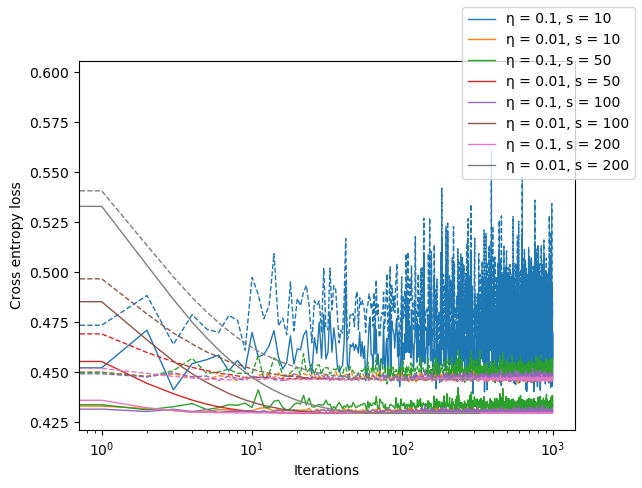

0.808


PyObject <matplotlib.legend.Legend object at 0x7f2632ab7510>

In [71]:
fig, ax = plt.subplots()
#for η in [0.1, 0.01, 0.001]
for batchsize in [10, 50, 100, 200], η in [0.1, 0.01]
    gd = NAGDContext(learningrate=η, tolerance=1e-7, maxiterations=1000,
        batchsize=batchsize)
    X, Y = copy(Xtrain), copy(Ytrain)
    tX, tY = copy(Xtest), copy(Ytest)
    clf_gd = LogisticClassifier(NesterovGradientDescent(gd))
    add_designmatrix!(clf_gd, X)
    addvalidationset!(clf_gd, tX, tY, false)
    fit!(clf_gd, Y)
    line = ax.plot(clf_gd.optimizer.loss, label="η = $η, s = $batchsize",
                   lw=1)
    ax.plot(clf_gd.optimizer.validationloss, "--", c=line[1].get_color(),
            lw=1)
    @show mean(tY .== predict(clf_gd, tX))
end
ax.set_xlabel("Iterations")
ax.set_ylabel("Cross entropy loss")
#ax.set_yscale("log")
ax.set_xscale("log")
fig.legend()

In [3]:
gd = GDContext(learningrate=0.01, tolerance=1e-7, maxiterations=1000)
clf_gd = LogisticClassifier(GradientDescent(gd))
add_designmatrix!(clf_gd, Xtrain)
addvalidationset!(clf_gd, Xtest, Ytest)
@time fit!(clf_gd, Ytrain)
@show clf_gd.optimizer.converged

  0.357835 seconds (846.94 k allocations: 42.719 MiB, 6.31% gc time)
  1.998947 seconds (5.97 M allocations: 295.296 MiB, 10.46% gc time)
clf_gd.optimizer.converged = false


false

In [4]:
sgd = SGDContext(learningrate=0.01, tolerance=1e-9, maxiterations=1000, batchsize=100)
clf_sgd = LogisticClassifier(StochasticGradientDescent(sgd))
add_designmatrix!(clf_sgd, Xtrain)
addvalidationset!(clf_sgd, Xtest, Ytest, false)
@time fit!(clf_sgd, Ytrain)
@show clf_sgd.optimizer.converged

  0.607023 seconds (488.51 k allocations: 26.268 MiB, 1.63% gc time)
  0.607240 seconds (488.87 k allocations: 26.275 MiB, 1.63% gc time)
clf_sgd.optimizer.converged = false


false

In [5]:
nagd = NAGDContext(learningrate=0.01, tolerance=1e-9, maxiterations=1000,
    batchsize=50, decayrate=0.8)
clf_nagd = LogisticClassifier(NesterovGradientDescent(nagd))
add_designmatrix!(clf_nagd, Xtrain)
addvalidationset!(clf_nagd, Xtest, Ytest, false)
@time fit!(clf_nagd, Ytrain)

@show clf_nagd.optimizer.converged
@show clf_nagd.optimizer.context.learningrate
@show clf_nagd.optimizer.context.decayrate
clf_nagd.optimizer.loss

  0.601571 seconds (504.59 k allocations: 26.895 MiB, 2.08% gc time)
  0.601779 seconds (504.95 k allocations: 26.902 MiB, 2.08% gc time)
clf_nagd.optimizer.converged = false
clf_nagd.optimizer.context.learningrate = 0.01
clf_nagd.optimizer.context.decayrate = 0.8


1000-element Array{Float64,1}:
 0.6868142571727034
 0.679796776179504 
 0.6748222380817267
 0.6700647161909152
 0.6655703558174154
 0.6623989079695427
 0.6599872448716048
 0.6571808565821756
 0.6549728331491677
 0.6532407535721632
 0.6520304140480015
 0.6504686667264298
 0.649456287999126 
 ⋮                 
 0.6219053706983414
 0.6221867512519006
 0.6219843180196356
 0.6220379090224581
 0.6219930913894323
 0.6218998118961045
 0.6219751850092659
 0.6219678511897548
 0.6220190164084486
 0.6225523565218459
 0.6219860270999045
 0.6219290808141505

In [7]:
ŷ = predict(clf, Xtest)
metrics.accuracy_score(Ytest, ŷ) |> println
metrics.confusion_matrix(Ytest, ŷ) |> println
metrics.roc_auc_score(Ytest, ŷ) |> println
metrics.roc_curve(Ytest, ŷ) |> println

UndefVarError: UndefVarError: clf not defined

In [9]:
lm = pyimport("sklearn.linear_model")
logreg = lm.LogisticRegression().fit(Xtrain, Ytrain)
@show logreg.score(Xtrain, Ytrain)
@show logreg.score(Xtest, Ytest)
for clf in (clf_gd, clf_sgd, clf_nagd)
    @show score(clf, Xtrain, Ytrain)
    @show score(clf, Xtest, Ytest)
end

logreg.score(Xtrain, Ytrain) = 0.8475
logreg.score(Xtest, Ytest) = 0.855
score(clf, Xtrain, Ytrain) = 0.84925
score(clf, Xtest, Ytest) = 0.857
score(clf, Xtrain, Ytrain) = 0.8475
score(clf, Xtest, Ytest) = 0.858
score(clf, Xtrain, Ytrain) = 0.848
score(clf, Xtest, Ytest) = 0.857


In [10]:
using Plots

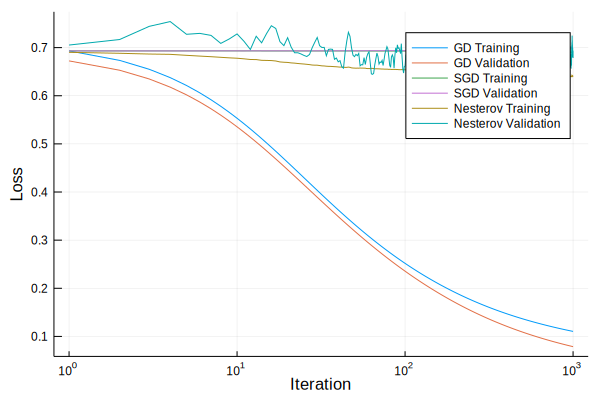

In [33]:
plot(clf_gd.optimizer.loss, label="GD Training", xscale=:log10)
plot!(clf_gd.optimizer.validationloss, label="GD Validation")
plot!(clf_sgd.optimizer.loss, label="SGD Training")
plot!(clf_sgd.optimizer.validationloss, label="SGD Validation", ylabel="Loss", xlabel="Iteration")
plot!(clf_nagd.optimizer.loss, label="Nesterov Training")
plot!(clf_nagd.optimizer.validationloss, label="Nesterov Validation")

In [3]:
import PyPlot; const plt = PyPlot;

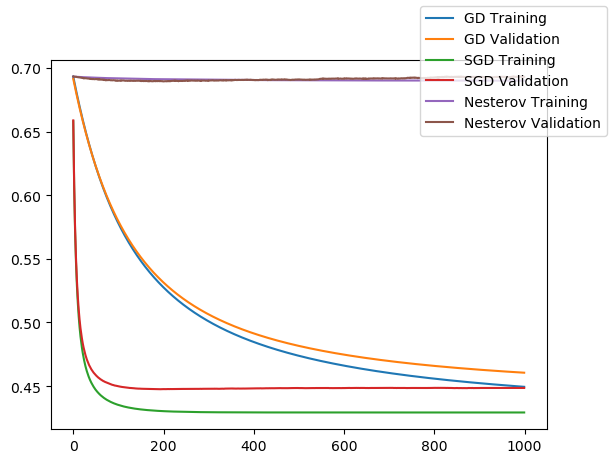

PyObject <matplotlib.legend.Legend object at 0x7f973ef663d0>

In [8]:
fig, ax = plt.subplots()
ax.plot(clf_gd.optimizer.loss, label="GD Training")
ax.plot(clf_gd.optimizer.validationloss, label="GD Validation")
ax.plot(clf_sgd.optimizer.loss, label="SGD Training")
ax.plot(clf_sgd.optimizer.validationloss, label="SGD Validation")
ax.plot(clf_nagd.optimizer.loss, label="Nesterov Training")
ax.plot(clf_nagd.optimizer.validationloss, label="Nesterov Validation")
ax.set_xlabel("Iterations")
ax.set_label("Cross Entropy Loss")
fig.legend()